# Trump Model Test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from pathlib import Path

In [3]:
path_to_data = Path('SW 06')
# Import only a fraction of data for efficient testing
data = pd.read_csv(path_to_data / '2018_10_18_trump.csv', header=None)
cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

# Forehand (yes = 1, no = 0)
forehand = ['FH']

user  = ['user']
trump = ['trump']

data.columns = cards + forehand + user + trump
pd.set_option('display.max_columns', None)
data.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,HK,HQ,HJ,H10,H9,H8,H7,H6,SA,SK,SQ,SJ,S10,S9,S8,S7,S6,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,FH,user,trump
0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,53248,6
1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,4613,5
2,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,68780,6
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,24555,5
4,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,8392,4


## import player statistics

In [4]:
stats = pd.read_json("04 Data/stat/player_all_stat.json")
stats.head()

,id,mean,std,nr
0,0,78.433100,42.186764,1978858
1,6955,76.191936,41.780344,4241
2,54404,78.010880,41.985297,7445
3,74994,76.775460,41.428476,7669
4,56143,76.774029,41.546253,978


In [5]:
stats.sort_values(by=['mean'], ascending=False)

,id,mean,std,nr
4563,30505,140.000000,0.000000,1
4476,78140,117.200000,39.448701,5
4540,50172,116.666667,35.803166,6
4485,9797,115.857143,35.324347,7
2988,51264,115.000000,35.853870,5
...,...,...,...,...
4064,34186,28.400000,48.366311,5
4598,38681,23.000000,0.000000,1
4469,509,20.600000,30.525399,5
4590,83958,10.000000,0.000000,2


# Drop bad players

In [6]:
good_users = stats.loc[(stats['mean'] > 79) & (stats['nr'] > 5)]
good_users

,id,mean,std,nr
10,55302,80.104669,42.997449,9382
11,5148,79.449837,42.014048,2452
20,55598,81.008357,42.616551,6701
26,6170,79.899005,42.884173,5426
27,62184,79.131810,42.586806,1138
...,...,...,...,...
4596,82568,79.222222,44.041962,9
4600,8740,81.300000,30.746454,10
4601,86397,93.250000,60.395719,8
4603,79771,89.750000,47.470804,12


In [7]:
data = data[data['user'].isin(good_users['id'])]
data

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,HK,HQ,HJ,H10,H9,H8,H7,H6,SA,SK,SQ,SJ,S10,S9,S8,S7,S6,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,FH,user,trump
0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,53248,6
1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,4613,5
4,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,8392,4
5,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,53076,5
10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,1,66261,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359800,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,37176,6
359811,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7750,2
359820,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,54390,6
359821,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,19345,2


# Training

In [8]:
from sklearn.model_selection import train_test_split
feature_columns = []
for color in 'DHSC':
    # Jack and nine combination
    new_col = '{}_J9'.format(color)
    data[new_col]  = data['{}J'.format(color)] & data['{}9'.format(color)]
    feature_columns.append(new_col)
    
    #Ace King and Queen
    new_col = '{}_AKQ'.format(color)
    data[new_col] = data['{}A'.format(color)] & data['{}K'.format(color)] & data['{}Q'.format(color)]
    feature_columns.append(new_col)

    #Ace and King
    new_col = '{}_AK'.format(color)
    data[new_col] = data['{}A'.format(color)] & data['{}K'.format(color)]
    feature_columns.append(new_col)

    #Ace Jack and Nine
    new_col = '{}_AJ9'.format(color)
    data[new_col]  = data['{}A'.format(color)] &data['{}J'.format(color)] & data['{}9'.format(color)]
    feature_columns.append(new_col)

    #Acem Jack, King, Queen
    new_col = '{}_AJKQ'.format(color)
    data[new_col]  = data['{}A'.format(color)] &data['{}J'.format(color)] & data['{}K'.format(color)] & data['{}Q'.format(color)]
    feature_columns.append(new_col)

    #Ace, 9, King, Queen
    new_col = '{}_A9KQ'.format(color)
    data[new_col]  = data['{}A'.format(color)] &data['{}9'.format(color)] & data['{}K'.format(color)] & data['{}Q'.format(color)]
    feature_columns.append(new_col)

In [10]:
x_data = pd.DataFrame(data[cards + feature_columns])
print(x_data)

y_data = data.trump

        DA  DK  DQ  DJ  D10  D9  D8  D7  D6  HA  HK  HQ  HJ  H10  H9  H8  H7  \
0        0   0   0   1    1   0   1   1   0   0   0   0   0    0   0   0   0   
1        0   0   0   0    0   0   0   0   1   1   0   0   0    0   1   1   0   
4        0   1   0   0    0   0   0   0   1   1   1   1   0    0   0   1   0   
5        0   0   1   0    0   0   1   0   1   0   1   1   0    0   1   0   0   
10       0   0   0   0    0   0   0   1   0   0   0   0   0    0   0   1   0   
...     ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..   
359800   1   1   0   0    0   0   1   0   1   0   0   0   0    1   1   0   0   
359811   1   1   0   0    0   1   0   0   1   0   0   0   0    0   1   0   0   
359820   0   0   0   0    0   1   0   0   0   0   1   0   0    0   0   0   1   
359821   1   0   0   0    0   0   0   0   1   1   0   1   0    0   0   1   0   
359822   1   1   1   0    0   0   0   0   0   0   0   0   0    0   1   0   0   

        H6  SA  SK  SQ  SJ  S10  S9  S8

In [10]:
X_train, X_test, y_train_data, y_test_data = train_test_split(x_data, y_data, test_size=0.2, stratify=data.trump, random_state=42)

print(y_train_data)
#y_train_label = np.argmax(x_train, axis=1)
#y_categorical = tf.keras.utils.to_categorical(y_train_label, num_classes=4)

55266     2
231526    1
318582    6
251538    5
118043    1
         ..
314304    3
53946     6
149889    3
240322    1
294276    6
Name: trump, Length: 81597, dtype: int64


In [11]:
y_train = pd.get_dummies(y_train_data)
y_test = pd.get_dummies(y_test_data)
print(y_train)
input_length = len(cards + feature_columns)
print(input_length)

        0  1  2  3  4  5  6
55266   0  0  1  0  0  0  0
231526  0  1  0  0  0  0  0
318582  0  0  0  0  0  0  1
251538  0  0  0  0  0  1  0
118043  0  1  0  0  0  0  0
...    .. .. .. .. .. .. ..
314304  0  0  0  1  0  0  0
53946   0  0  0  0  0  0  1
149889  0  0  0  1  0  0  0
240322  0  1  0  0  0  0  0
294276  0  0  0  0  0  0  1

[81597 rows x 7 columns]


In [12]:
input_length = len(cards + feature_columns)
print(input_length)

model = keras.Sequential()
model.add(keras.layers.Dense(input_length, activation='relu', input_shape=[input_length]))
model.add(keras.layers.Dense(80, activation='relu'))
model.add(keras.layers.Dense(40, activation='relu'))
model.add(keras.layers.Dense(36, activation='relu'))
model.add(keras.layers.Dense(36, activation='relu'))
model.add(keras.layers.Dense(14, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.25, epochs=300, batch_size=100)

Epoch 1/300
612/612 [==============================] - 3s 5ms/step - loss: 1.8172 - accuracy: 0.3820 - val_loss: 1.7606 - val_accuracy: 0.3901
Epoch 2/300
612/612 [==============================] - 3s 5ms/step - loss: 1.7611 - accuracy: 0.3880 - val_loss: 1.7502 - val_accuracy: 0.3901
Epoch 3/300
612/612 [==============================] - 3s 4ms/step - loss: 1.7525 - accuracy: 0.3880 - val_loss: 1.7432 - val_accuracy: 0.3901
Epoch 4/300
612/612 [==============================] - 3s 4ms/step - loss: 1.7428 - accuracy: 0.3880 - val_loss: 1.7314 - val_accuracy: 0.3901
Epoch 5/300
612/612 [==============================] - 3s 4ms/step - loss: 1.7280 - accuracy: 0.3880 - val_loss: 1.7049 - val_accuracy: 0.3901
Epoch 6/300
612/612 [==============================] - 3s 4ms/step - loss: 1.6983 - accuracy: 0.3884 - val_loss: 1.6528 - val_accuracy: 0.3901
Epoch 7/300
612/612 [==============================] - 3s 4ms/step - loss: 1.6556 - accuracy: 0.3906 - val_loss: 1.5899 - val_accuracy: 0.3930

Epoch 58/300
612/612 [==============================] - 3s 4ms/step - loss: 1.1056 - accuracy: 0.5711 - val_loss: 0.9447 - val_accuracy: 0.6172
Epoch 59/300
612/612 [==============================] - 2s 4ms/step - loss: 1.1058 - accuracy: 0.5689 - val_loss: 0.9461 - val_accuracy: 0.6125
Epoch 60/300
612/612 [==============================] - 2s 4ms/step - loss: 1.1049 - accuracy: 0.5685 - val_loss: 0.9416 - val_accuracy: 0.6138
Epoch 61/300
612/612 [==============================] - 2s 4ms/step - loss: 1.1053 - accuracy: 0.5685 - val_loss: 0.9400 - val_accuracy: 0.6155
Epoch 62/300
612/612 [==============================] - 3s 6ms/step - loss: 1.1032 - accuracy: 0.5707 - val_loss: 0.9402 - val_accuracy: 0.6135
Epoch 63/300
612/612 [==============================] - 3s 6ms/step - loss: 1.0945 - accuracy: 0.5722 - val_loss: 0.9416 - val_accuracy: 0.6150
Epoch 64/300
612/612 [==============================] - 3s 5ms/step - loss: 1.1014 - accuracy: 0.5696 - val_loss: 0.9467 - val_accuracy:

Epoch 115/300
612/612 [==============================] - 2s 4ms/step - loss: 1.0321 - accuracy: 0.5877 - val_loss: 0.9184 - val_accuracy: 0.6260
Epoch 116/300
612/612 [==============================] - 3s 4ms/step - loss: 1.0399 - accuracy: 0.5818 - val_loss: 0.9185 - val_accuracy: 0.6211
Epoch 117/300
612/612 [==============================] - 2s 4ms/step - loss: 1.0324 - accuracy: 0.5859 - val_loss: 0.9144 - val_accuracy: 0.6223
Epoch 118/300
612/612 [==============================] - 3s 4ms/step - loss: 1.0303 - accuracy: 0.5836 - val_loss: 0.9182 - val_accuracy: 0.6192
Epoch 119/300
612/612 [==============================] - 3s 4ms/step - loss: 1.0348 - accuracy: 0.5850 - val_loss: 0.9205 - val_accuracy: 0.6213
Epoch 120/300
612/612 [==============================] - 3s 4ms/step - loss: 1.0346 - accuracy: 0.5861 - val_loss: 0.9182 - val_accuracy: 0.6241
Epoch 121/300
612/612 [==============================] - 2s 4ms/step - loss: 1.0364 - accuracy: 0.5843 - val_loss: 0.9230 - val_ac

612/612 [==============================] - 2s 4ms/step - loss: 0.9598 - accuracy: 0.6029 - val_loss: 0.9415 - val_accuracy: 0.6184
Epoch 228/300
612/612 [==============================] - 2s 4ms/step - loss: 0.9609 - accuracy: 0.6024 - val_loss: 0.9373 - val_accuracy: 0.6228
Epoch 229/300
612/612 [==============================] - 2s 4ms/step - loss: 0.9666 - accuracy: 0.6005 - val_loss: 0.9477 - val_accuracy: 0.6201
Epoch 230/300
612/612 [==============================] - 3s 4ms/step - loss: 0.9657 - accuracy: 0.6011 - val_loss: 0.9458 - val_accuracy: 0.6211
Epoch 231/300
612/612 [==============================] - 3s 4ms/step - loss: 0.9635 - accuracy: 0.6032 - val_loss: 0.9388 - val_accuracy: 0.6190
Epoch 232/300
612/612 [==============================] - 3s 4ms/step - loss: 0.9612 - accuracy: 0.6032 - val_loss: 0.9561 - val_accuracy: 0.6224
Epoch 233/300
612/612 [==============================] - 2s 4ms/step - loss: 0.9577 - accuracy: 0.6038 - val_loss: 0.9450 - val_accuracy: 0.6166

In [13]:
model.evaluate(X_test, y_test)

638/638 [==============================] - 3s 4ms/step - loss: 0.9710 - accuracy: 0.6204


[0.9710139036178589, 0.6203921437263489]

Text(0, 0.5, 'loss')

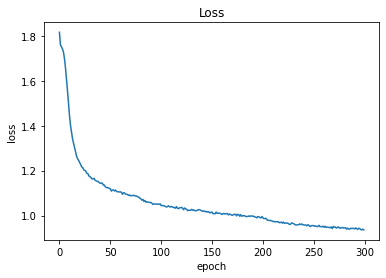

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

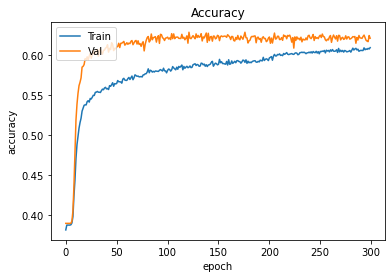

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

# Predict

In [16]:
hand = np.array([[0,1,1,1,0,1,0,0,0, 0,0,0,0,1,0,0,1,0, 1,0,0,0,0,0,0,0,0, 0,0,0,0,0,1,0,0,1]])
hand = pd.DataFrame(data=hand, columns=cards)

for color in 'DHSC':
    # Jack and nine combination
    new_col = '{}_J9'.format(color)
    hand[new_col] = hand['{}J'.format(color)] & hand['{}9'.format(color)]
    
    #Ace King and Queen
    new_col = '{}_AKQ'.format(color)
    hand[new_col] = hand['{}A'.format(color)] & hand['{}K'.format(color)] & hand['{}Q'.format(color)]

    #Ace and King
    new_col = '{}_AK'.format(color)
    hand[new_col] = hand['{}A'.format(color)] & hand['{}K'.format(color)]

    #Ace Jack and Nine
    new_col = '{}_AJ9'.format(color)
    hand[new_col] = hand['{}A'.format(color)] & hand['{}J'.format(color)] & hand['{}9'.format(color)]

    #Acem Jack, King, Queen
    new_col = '{}_AJKQ'.format(color)
    hand[new_col] = hand['{}A'.format(color)] & hand['{}J'.format(color)] & hand['{}K'.format(color)] & hand['{}Q'.format(color)]

    #Ace, 9, King, Queen
    new_col = '{}_A9KQ'.format(color)
    hand[new_col] = hand['{}A'.format(color)] & hand['{}9'.format(color)] & hand['{}K'.format(color)] & hand['{}Q'.format(color)]

print(hand)
input_hand = np.array([hand.iloc[0].values])
prediction = model.predict(input_hand)
result = pd.DataFrame(data=prediction, columns=["DIAMONDS", "HEARTS", "SPADES", "CLUBS", "OBE_ABE", "UNE_UFE", "PUSH"])
print(result)
result.idxmax(axis=1)

   DA  DK  DQ  DJ  D10  D9  D8  D7  D6  HA  HK  HQ  HJ  H10  H9  H8  H7  H6  \
0   0   1   1   1    0   1   0   0   0   0   0   0   0    1   0   0   1   0   

   SA  SK  SQ  SJ  S10  S9  S8  S7  S6  CA  CK  CQ  CJ  C10  C9  C8  C7  C6  \
0   1   0   0   0    0   0   0   0   0   0   0   0   0    0   1   0   0   1   

   D_J9  D_AKQ  D_AK  D_AJ9  D_AJKQ  D_A9KQ  H_J9  H_AKQ  H_AK  H_AJ9  H_AJKQ  \
0     1      0     0      0       0       0     0      0     0      0       0   

   H_A9KQ  S_J9  S_AKQ  S_AK  S_AJ9  S_AJKQ  S_A9KQ  C_J9  C_AKQ  C_AK  C_AJ9  \
0       0     0      0     0      0       0       0     0      0     0      0   

   C_AJKQ  C_A9KQ  
0       0       0  
   DIAMONDS    HEARTS    SPADES     CLUBS   OBE_ABE   UNE_UFE      PUSH
0   0.51996  0.000139  0.000058  0.000011  0.021558  0.001509  0.456765


0    DIAMONDS
dtype: object

In [ ]:
#model.save("E:/Work/trump_model")